In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# BOX PLOT


Text(0.5, 1.0, 'DETECTING OUTLIER USING BOXPLOT')

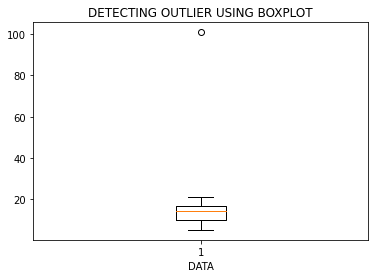

In [3]:
data=[15,101,18,7,13,16,11,21,5,15,10,9]
plt.boxplot(data)
plt.xlabel("DATA")
plt.title("DETECTING OUTLIER USING BOXPLOT")

Text(0.5, 1.0, 'DETECTING OUTLIER USING BOXPLOT')

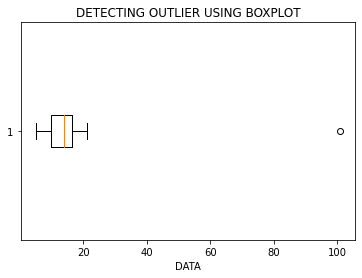

In [4]:
plt.boxplot(data,vert=False)
plt.xlabel("DATA")
plt.title("DETECTING OUTLIER USING BOXPLOT")

In [5]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:ylabel='age'>

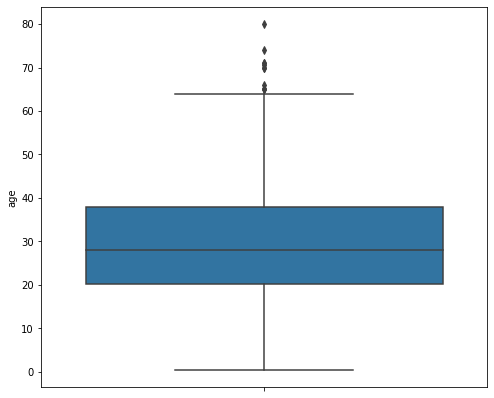

In [6]:
#univariant
plt.figure(figsize=(8,7))
sns.boxplot(y='age',data=df)


<AxesSubplot:xlabel='sex', ylabel='age'>

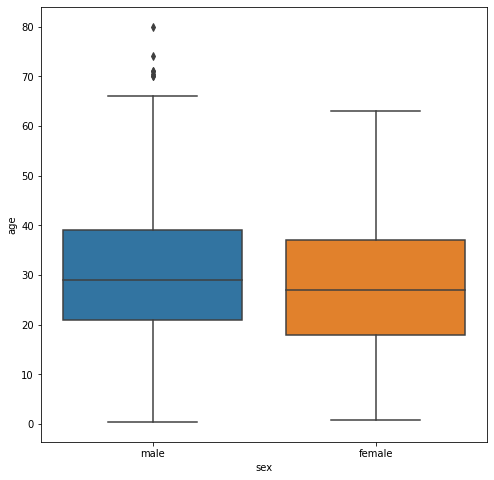

In [7]:
#multivariant
plt.figure(figsize=(8,8))
sns.boxplot(x='sex',y='age',data=df)

<AxesSubplot:>

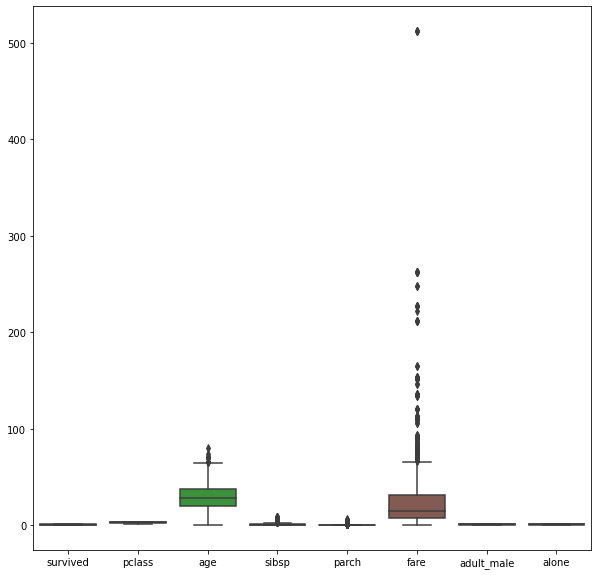

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

## scatter plot

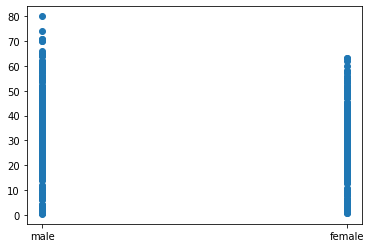

In [9]:
plt.scatter(y="age",x="sex",data=df)

# Z-SCORE

In [10]:
data=[15,101,18,7,13,16,11,21,5,15,10,9]
def outlier_detection(data):
    outlier=[]
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z=(i-mean)/std
        if z>3:
            outlier.append(i)
    return outlier
outlier_for_data=outlier_detection(data)
print("outlier detection using z score",outlier_for_data)

outlier detection using z score [101]


In [11]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
def outlier_detection(data):
    outlier=[]
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z=(i-mean)/std
        if z>3:
            outlier.append(i)
    return outlier
outlier_for_data=outlier_detection(df['age'])
print("outlier detection using z score",outlier_for_data)

outlier detection using z score [80.0, 74.0]


# I.Q.R 

In [14]:
# IQR=Q3-Q1


In [15]:
data=[15,101,18,7,13,16,11,21,5,15,10,9]
def delete_outlier_iqr(data):
    outlier=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lower_bond=q1-(1.5*iqr)
    upper_bond=q3+(1.5*iqr)
    for i in data:
        if(i<lower_bond or i>upper_bond):
            outlier.append(i)
    return outlier
sample_data=delete_outlier_iqr(data)
print("outlier detection using IQR",sample_data)

outlier detection using IQR [101]


In [16]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
df1=df['age'].dropna()

In [19]:
df1

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [20]:
def delete_outlier_iqr(data):
    outlier=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    print(q1,q3)
    iqr=q3-q1
    lower_bond=q1-(1.5*iqr)
    upper_bond=q3+(1.5*iqr)
    for i in data:
        if(i<lower_bond or i>upper_bond):
            outlier.append(i)
    return outlier
sample_data=delete_outlier_iqr(df1)
print("outlier detection using IQR",sample_data)

20.125 38.0
outlier detection using IQR [65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


In [21]:
def delete_outlier_iqr(data):
    outlier=[]
    q1=data.quantile(q=0.25)
    q3=data.quantile(q=0.75)
    iqr=q3-q1
    lower_bond=q1-(1.5*iqr)
    upper_bond=q3+(1.5*iqr)
    for i in data:
        if(i<lower_bond or i>upper_bond):
            outlier.append(i)
    return outlier
sample_data=delete_outlier_iqr(df1)
print("outlier detection using IQR",sample_data)

outlier detection using IQR [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]


<AxesSubplot:xlabel='age', ylabel='Count'>

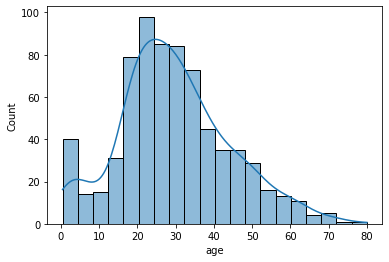

In [22]:
sns.histplot(df1,kde=True)